# Analyze LedaSila database 

* containing 33.000 videos with Österreichische Gebärdensprache

* property of Alpen Adria Universität Klagenfurt, http://ledasila.aau.at

In [1]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# find all folders with videos
# in each folder search all video-files of Leadsila database, read filenames, add to dataframe
# extract first word and analyze freqency

In [3]:
os.getcwd()
os.chdir("../datasets/01-ledasila")
os.getcwd()

'/Users/Frederik/Dev/sign-language/datasets/01-ledasila'

In [4]:
dfFiles = pd.DataFrame(glob.glob("**", recursive=True), dtype=str, columns=["sPath"])

In [5]:
dfFiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33337 entries, 0 to 33336
Data columns (total 1 columns):
sPath    33337 non-null object
dtypes: object(1)
memory usage: 260.5+ KB


In [6]:
dfFiles.head(15)

,sPath
0,_tar
1,_tar/ÖGS Gebärden.tar
2,r
3,r/Ringen---k---vid-77479---lsid-46634.mp4
4,r/Rote__R_uebe---ogs---vid-27931---lsid-29402.mp4
5,r/reden---k---vid-76401---lsid-46120.mp4
6,r/rauchen---ogs---vid-26975---lsid-28269.mp4
7,r/riechen---s---vid-76597---lsid-46215.mp4
8,r/Rahm---v---vid-11807---lsid-15423.mp4
9,r/rund---v---vid-55914---lsid-39943.mp4


In [7]:
#for i in range(dfFiles.shape[0]):
#    sPath = dfFiles.loc[:,"sPath"]
#    sFile = sPath.split("/")[1]
    

In [8]:
# delete all folders/files without extension
dfFiles.loc[dfFiles.sPath.apply(lambda s: len(s.split("."))<=1),:] = None
dfFiles.dropna(inplace=True)

In [9]:
# only retain mp4 files
dfFiles.loc[dfFiles.sPath.apply(lambda s: s.split(".")[1] != "mp4"),:] = None
dfFiles.dropna(inplace=True)
#dfFiles.head(15)

In [11]:
# extract word
dfFiles["sWord"] = dfFiles.sPath.apply(lambda s: s.split("/")[1].split("-")[0])
dfFiles.sample(5)

,sPath,sWord
20827,d/Designer---ogs---vid-77920---lsid-46845.mp4,Designer
6713,s/Staat---st---vid-66381---lsid-42451.mp4,Staat
17674,m/M_aerchen---t---vid-71050---lsid-43829.mp4,M_aerchen
11152,a/Anzahlung---ogs---vid-39004---lsid-32900.mp4,Anzahlung
4816,z/zehn__Millionen___KK10_PP000_PP000_ZZ---ogs-...,zehn__Millionen___KK10_PP000_PP000_ZZ


In [12]:
# number of videos
dfFiles.shape[0]

33308

In [13]:
# unique words
dfFiles.sWord.unique().shape[0]

15684

In [14]:
dfWord_freq = dfFiles.groupby("sWord").size().sort_values(ascending=False).reset_index(name="nCount")
dfWord_freq.iloc[:20,:]

,sWord,nCount
0,nein,34
1,schw_aermen,27
2,was,25
3,wann,24
4,nicht,22
5,fertig,22
6,ja,21
7,Banane,20
8,Motorrad,20
9,Fenster,20


In [15]:
dfWord_freq["nCumSum"] = dfWord_freq.nCount.cumsum()

(<matplotlib.axes._subplots.AxesSubplot at 0x1142bc048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113aecbe0>)

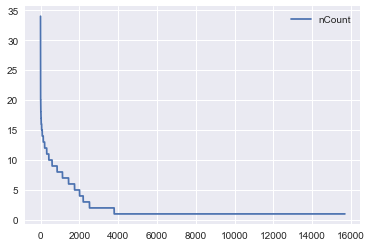

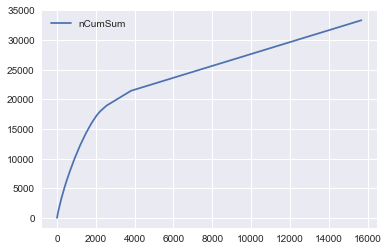

In [16]:
dfWord_freq.plot(y="nCount", ), dfWord_freq.plot(y="nCumSum")

In [18]:
dfWord_freq.query("nCount >= 20").tail()

,sWord,nCount,nCumSum
6,ja,21,175
7,Banane,20,195
8,Motorrad,20,215
9,Fenster,20,235
10,Oma,20,255


---
## Summary of training data

Total: 33,300 training videos, 15,700 different words

Min 20 occurences: 10 words, total of 255 videos

Min 18 occurences: 20 words, total of 440 videos

Min 15 occurences: 84 words, total of 1443 videos

Min 10 occurences: 592 words, total of 7,271 videos

Min 3 occurences: 2519 words, total of 18872 videos

---